<a href="https://colab.research.google.com/github/ChaithrikaYadav/DeepLearning2025-26/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`14-01-2026`**

100%|██████████| 9.91M/9.91M [00:00<00:00, 58.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.79MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.74MB/s]


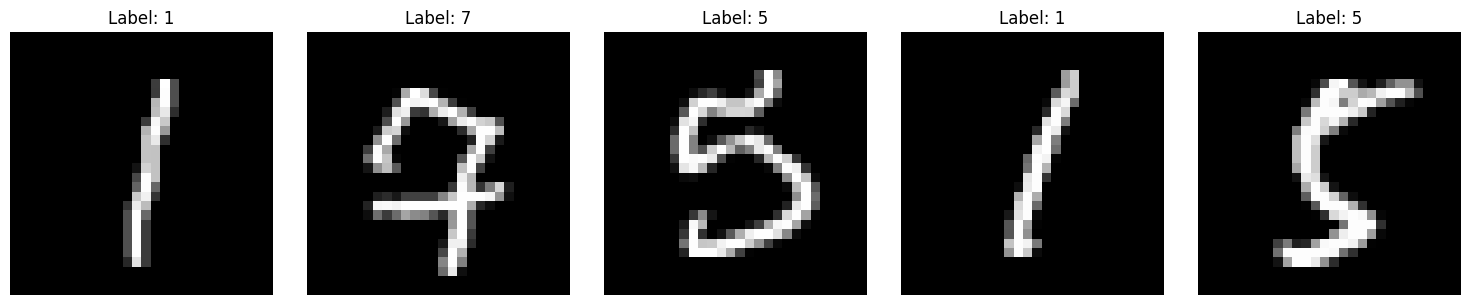

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def load_mnist(batch_size=5):
    transform = transforms.ToTensor()
    dataset = datasets.MNIST(
        root="./data",
        train=True,
        download=True,
        transform=transform
    )
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

def visualize_samples(dataloader, num_samples=5):
    images, labels = next(iter(dataloader))

    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

train_loader = load_mnist(batch_size=5)
visualize_samples(train_loader)

**28-01-2026**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/refs/heads/master/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.Gender.nunique()

2

In [3]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Geography = le.fit_transform(df.Geography)
df.Gender = le.fit_transform(df.Gender)

In [5]:
df.Geography

,Geography
0,0
1,2
2,0
3,0
4,2
...,...
9995,0
9996,0
9997,0
9998,1


In [6]:
df.Geography.unique()

array([0, 2, 1])

In [7]:
df.Gender

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [8]:
df.Gender.unique()

array([0, 1])

In [12]:

df =df.drop(columns="Surname", axis=1)
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler


In [16]:
df = df.drop(columns= "RowNumber", axis = 1)


In [17]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
y = df.Exited
X = df.drop(columns="Exited", axis=1)


In [19]:
X

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [20]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42, shuffle= False)
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((8000, 11), (2000, 11), (8000,), (2000,))

In [23]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [24]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(15, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(28, activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 19)             │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 28)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,798 (7.02 KB)

 Trainable params: 1,798 (7.02 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7964 - loss: 0.5385 - val_accuracy: 0.8080 - val_loss: 0.4617
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8061 - loss: 0.4492 - val_accuracy: 0.8135 - val_loss: 0.4295
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8174 - loss: 0.4125 - val_accuracy: 0.8235 - val_loss: 0.4055
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8299 - loss: 0.3838 - val_accuracy: 0.8345 - val_loss: 0.3885
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.3680 - val_accuracy: 0.8350 - val_loss: 0.3873
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8445 - loss: 0.3595 - val_accuracy: 0.8410 - val_loss: 0.3780
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8529 - loss: 0.3522 - val_accuracy: 0.8460 - val_loss: 0.3787
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8611 - loss: 0.3497 - val_accuracy: 0

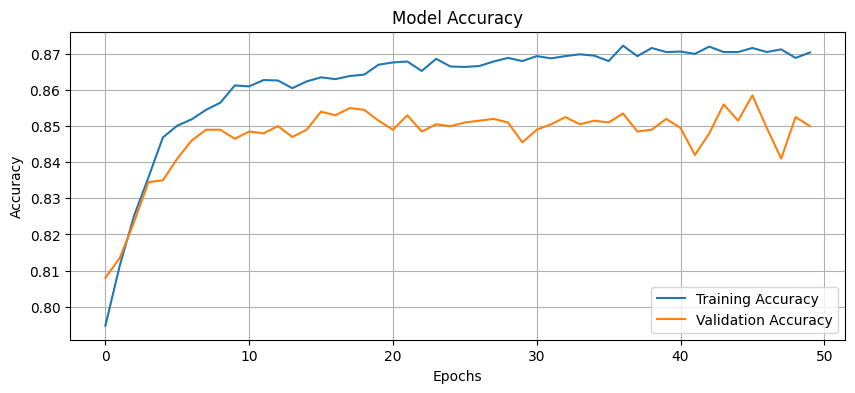

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


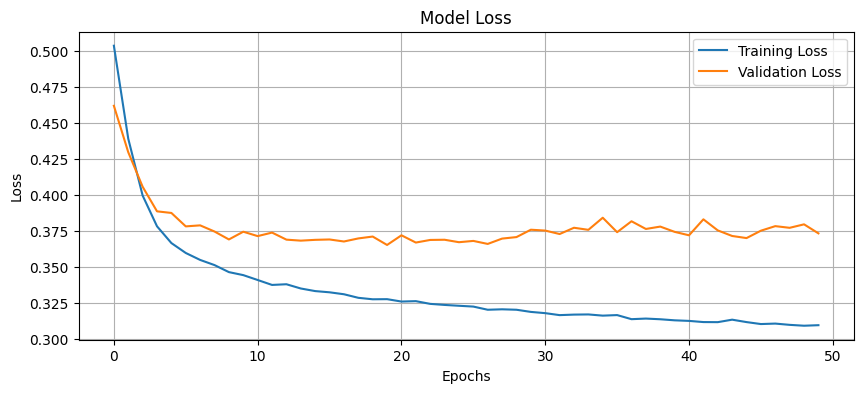

In [31]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8398 - loss: 0.3836

Test Accuracy: 85.00%
